In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv(("~/Desktop/Data_Science/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [7]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


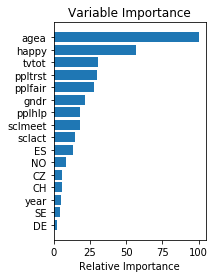

In [8]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## DRILL: Improve this gradient boost model
While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

Creating new features
Applying more overfitting-prevention strategies like subsampling
More iterations
Trying a different loss function
Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Let's first some details about our target - how many respondants live with a partner?

In [49]:
y.value_counts()

0.0    5013
1.0    3134
Name: partner, dtype: int64

In [50]:
3134/(5013+3134)

0.3846814778446054

Almost 40% of respondants live with a partner.

### Create new features

In [10]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [13]:
X['sclmeet'].value_counts()

6.0    2653
7.0    1576
4.0    1517
5.0    1396
3.0     563
2.0     365
1.0      77
Name: sclmeet, dtype: int64

In [14]:
X['sclact'].value_counts()

3.0    3917
2.0    2110
4.0    1162
1.0     739
5.0     219
Name: sclact, dtype: int64

In [11]:
X['meet_act'] = X['sclmeet'] * X['sclact']

In [15]:
X['meet-act'] = X['sclmeet'] - X['sclact']

In [59]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors1 = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors1 = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors1 = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors1 = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors1, train_tII_errors1, test_tI_errors1, test_tII_errors1))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


By adding features that make use of two less important variables, the accuracy with the test set has improved, but only slightsly.  False positives have been reduced from 6.4% to 6.3%.  False Negatives have been reduced from 18.8% to 18.5%.

### Feature Selection

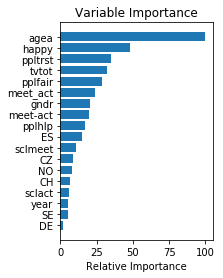

In [17]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [64]:
# drop the least important half of features
X.drop(['DE', 'SE', 'year', 'sclact', 'CH', 'NO', 'CZ', 'sclmeet', 'ES'], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors2 = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors2 = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors2 = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors2 = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors2, train_tII_errors2, test_tI_errors2, test_tII_errors2))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


Dropping the least important half of features has no impact on accuracy.  False positives are still at 6.3% and false negatives at 18.5%

### Test Iterations

In [69]:
#Test increase in iterations

interation_results = pd.DataFrame()

def iteration_fit(iterations):
    params = {'n_estimators': iterations,
          'max_depth': 2,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"interation_number": [iterations], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(100, 2000, 100)
for i in test_range:
    result = iteration_fit(i)
    appended_data.append(result)
iteration_results = pd.concat(appended_data, ignore_index=True)

print(iteration_results.head())

   interation_number   test_tI  test_tII  train_tI  train_tII
0                100  0.050307  0.208589  0.040371   0.196672
1                200  0.053988  0.197546  0.044463   0.186579
2                300  0.053988  0.188957  0.045827   0.180306
3                400  0.060123  0.187730  0.046918   0.178532
4                500  0.062577  0.185276  0.046508   0.176077


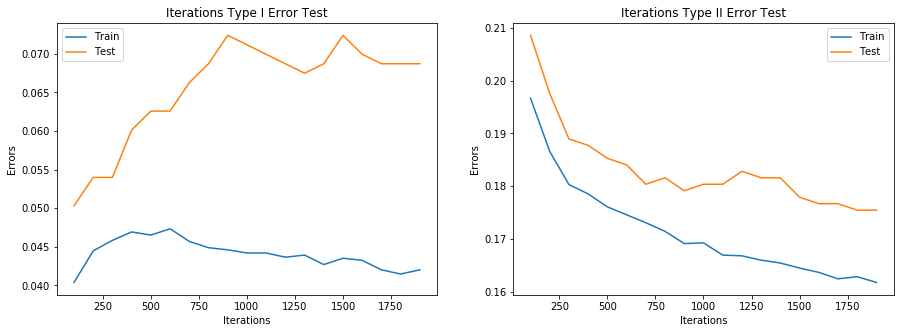

In [70]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_results['interation_number'], iteration_results['train_tI'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tI'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(iteration_results['interation_number'], iteration_results['train_tII'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tII'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type II Error Test')

plt.show()

Increasing the number of iterations does bring improvement to Type II errors in the test set, but Type I errors generally increase with increased iterations.
The optimum number of iterations would then depend on which error type was most valuable to minimize.  For just predictive power, it would be the total of the errors that would be most significant

In [74]:
iteration_results['test_error'] = iteration_results['test_tI'] + iteration_results['test_tII']
iteration_results['train_error'] = iteration_results['train_tI'] + iteration_results['train_tII']

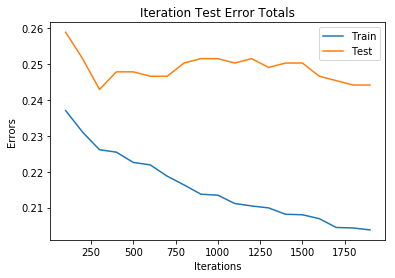

In [75]:
plt.plot(iteration_results['interation_number'], iteration_results['train_error'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_error'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iteration Test Error Totals')

plt.show()

It looks like our best result is close to 250 iterations.

In [77]:
#Test increase in iterations

interation_results = pd.DataFrame()

def iteration_fit(iterations):
    params = {'n_estimators': iterations,
          'max_depth': 2,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"interation_number": [iterations], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(100, 300, 10)
for i in test_range:
    result = iteration_fit(i)
    appended_data.append(result)
iteration_results = pd.concat(appended_data, ignore_index=True)

iteration_results['test_error'] = iteration_results['test_tI'] + iteration_results['test_tII']

print('Iterations with least error:')
iteration_results.loc[iteration_results['test_error'] == iteration_results['test_error'].min()]

Iterations with least error:


,interation_number,test_tI,test_tII,train_tI,train_tII,test_error
17,270,0.053988,0.188957,0.044872,0.180987,0.242945
18,280,0.053988,0.188957,0.046099,0.180578,0.242945


In [78]:
# change parameters to 270 iterations
params = {'n_estimators': 270,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors1 = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors1 = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors1 = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors1 = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors1, train_tII_errors1, test_tI_errors1, test_tII_errors1))

Training set accuracy:
Percent Type I errors: 0.04487179487179487
Percent Type II errors: 0.180987452264048

Test set accuracy:
Percent Type I errors: 0.053987730061349694
Percent Type II errors: 0.18895705521472392


Now we've improved our Type I errors to 5.4%, while suffering only a slight increase in Type II errors to 18.9%

### Test Max Depth

In [79]:
#Test increase in iterations

depth_results = pd.DataFrame()

def depth_fit(depth):
    params = {'n_estimators': 270,
          'max_depth': depth,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"depth_number": [depth], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(1, 10, 1)
for i in test_range:
    result = depth_fit(i)
    appended_data.append(result)
depth_results = pd.concat(appended_data, ignore_index=True)

print(depth_results.head())

   depth_number   test_tI  test_tII  train_tI  train_tII
0             1  0.047853  0.211043  0.042826   0.203628
1             2  0.053988  0.188957  0.044872   0.180987
2             3  0.072393  0.179141  0.041053   0.164894
3             4  0.072393  0.184049  0.028914   0.144163
4             5  0.092025  0.174233  0.014866   0.105565


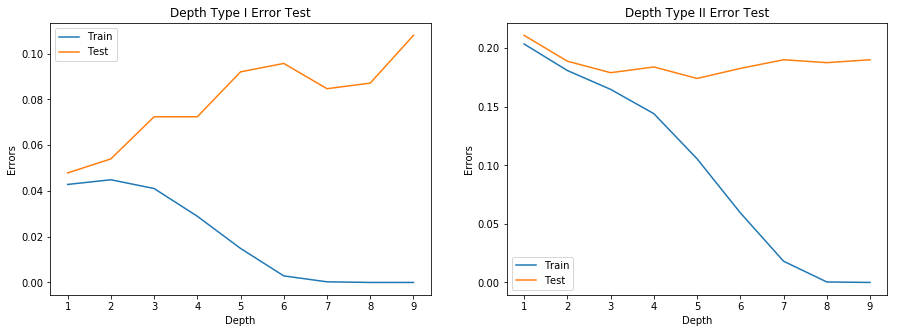

In [84]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(depth_results['depth_number'], depth_results['train_tI'], label="Train")
plt.plot(depth_results['depth_number'], depth_results['test_tI'], label="Test")
plt.xlabel('Depth')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Depth Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(depth_results['depth_number'], depth_results['train_tII'], label="Train")
plt.plot(depth_results['depth_number'], depth_results['test_tII'], label="Test")
plt.xlabel('Depth')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Depth Type II Error Test')

plt.show()

In [81]:
depth_results['test_error'] = depth_results['test_tI'] + depth_results['test_tII']

print('Depth with least total error:')
depth_results.loc[depth_results['test_error'] == depth_results['test_error'].min()]

Depth with least total error:


,depth_number,test_tI,test_tII,train_tI,train_tII,test_error
1,2,0.053988,0.188957,0.044872,0.180987,0.242945


While the training data shows reduced errors with more depth, this over-fitting is not helping the test set.  We're best sticking with depth of 2.

### Test Subsample

In [85]:
#Test increase in iterations

sub_results = pd.DataFrame()

def sub_fit(fraction):
    params = {'n_estimators': 270,
          'max_depth': 2,
            'subsample' : fraction,
          'loss': 'deviance'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"sub_number": [fraction], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(0.6, 0.99, 0.03)
for i in test_range:
    result = sub_fit(i)
    appended_data.append(result)
sub_results = pd.concat(appended_data, ignore_index=True)

print(sub_results.head())

   sub_number   test_tI  test_tII  train_tI  train_tII
0        0.60  0.062577  0.187730  0.047054   0.179896
1        0.63  0.065031  0.190184  0.046236   0.178123
2        0.66  0.063804  0.187730  0.049645   0.175941
3        0.69  0.058896  0.193865  0.047190   0.178532
4        0.72  0.061350  0.185276  0.047327   0.177578


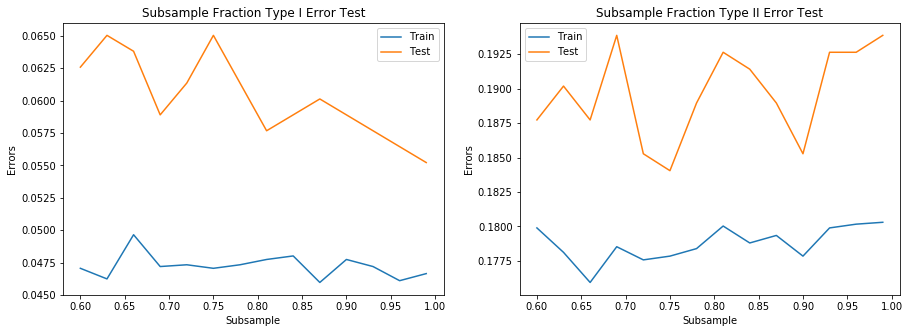

In [86]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(sub_results['sub_number'], sub_results['train_tI'], label="Train")
plt.plot(sub_results['sub_number'], sub_results['test_tI'], label="Test")
plt.xlabel('Subsample')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Subsample Fraction Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(sub_results['sub_number'], sub_results['train_tII'], label="Train")
plt.plot(sub_results['sub_number'], sub_results['test_tII'], label="Test")
plt.xlabel('Subsample')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Subsample Fraction Type II Error Test')

plt.show()

In [87]:
sub_results['test_error'] = sub_results['test_tI'] + sub_results['test_tII']

print('Subsample fraction with least total error:')
sub_results.loc[sub_results['test_error'] == sub_results['test_error'].min()]

Subsample fraction with least total error:


,sub_number,test_tI,test_tII,train_tI,train_tII,test_error
10,0.9,0.058896,0.185276,0.047736,0.177851,0.244172


Our best overall result comes with a subsample of 0.9, but the difference from our prior model is minimal.  Given the nature of decision trees, that gain is not sustainable.

### Loss Function - Exponential

Test interation counts with exponential loss function

In [96]:
# change parameters to 270 iterations
params = {'n_estimators': 270,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errorsE = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errorsE = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errorsE = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errorsE = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errorsE, train_tII_errorsE, test_tI_errorsE, test_tII_errorsE))

Training set accuracy:
Percent Type I errors: 0.046235679214402615
Percent Type II errors: 0.18316966721222042

Test set accuracy:
Percent Type I errors: 0.05644171779141104
Percent Type II errors: 0.19263803680981595


In [97]:
test_tI_errorsE + test_tII_errorsE

0.249079754601227

By changing the Loss Function to Exponential, we lose those small gained by tuning our model iterations - Type I error are up from 5.4% to 5.6% and Type II are up from 18.5% to 19.3%.

We need to re-tune.

In [98]:
#Test increase in iterations

interation_results = pd.DataFrame()

def iteration_fit(iterations):
    params = {'n_estimators': iterations,
          'max_depth': 2,
          'loss': 'exponential'}
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    
    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    
    data = pd.DataFrame({"interation_number": [iterations], "train_tI": [train_tI_errors], "train_tII": [train_tII_errors],
                        "test_tI": [test_tI_errors], "test_tII": [test_tII_errors]})
    return data
                                       
appended_data = []
test_range = np.arange(100, 2000, 100)
for i in test_range:
    result = iteration_fit(i)
    appended_data.append(result)
iteration_results = pd.concat(appended_data, ignore_index=True)

iteration_results['test_error'] = iteration_results['test_tI'] + iteration_results['test_tII']

print('Subsample fraction with least total error:')
iteration_results.loc[iteration_results['test_error'] == iteration_results['test_error'].min()]

Subsample fraction with least total error:


,interation_number,test_tI,test_tII,train_tI,train_tII,test_error
3,400,0.057669,0.188957,0.048418,0.178805,0.246626


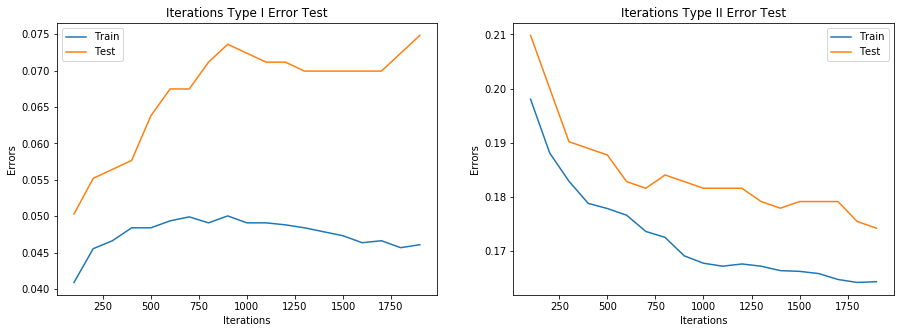

In [99]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(iteration_results['interation_number'], iteration_results['train_tI'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tI'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type I Error Test')

plt.subplot(1, 2, 2)
plt.plot(iteration_results['interation_number'], iteration_results['train_tII'], label="Train")
plt.plot(iteration_results['interation_number'], iteration_results['test_tII'], label="Test")
plt.xlabel('Iterations')
plt.ylabel('Errors')
plt.legend(loc='best') 
plt.title('Iterations Type II Error Test')

plt.show()

We see very similar resuts with tuned models using Exponential and Deviance Loss Functions.

In [100]:
# change parameters to 270 iterations
params = {'n_estimators': 400,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errorsE = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errorsE = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errorsE = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errorsE = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errorsE, train_tII_errorsE, test_tI_errorsE, test_tII_errorsE))

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1788052373158756

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.18895705521472392


From our original accuracy of 24.8% with Type I errors ar 6.3% and Type II errors ar 18.5% we have improved to 24.6% accuracy with 5.8% Type I errors and 18.9% Type II errors.